# **Time Series Project**
Asish Joel - 202103015

Manan Patel - 202103044

Raj Kariya  - 202103048

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Time series Project/TSADATA - Sheet1 (1).csv'
data = pd.read_csv(file_path,parse_dates=True)

In [ ]:
data.isna().sum()

time                    0
latitude                0
longitude               0
depth                 478
mag                     0
magType                 1
nst                187277
gap                137231
dmin               210490
rms                 46747
net                     0
id                      0
updated                 0
place                   0
type                    0
horizontalError    217581
depthError         136747
magError           198211
magNst              83625
status                  0
locationSource          0
magSource               0
dtype: int64

In [ ]:
data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,289739.000000,289739.000000,289261.000000,289739.000000,102462.000000,152508.000000,79249.000000,242992.000000,72158.000000,152992.000000,91528.000000,206114.000000
mean,4.193838,42.043146,69.785973,4.929963,81.716958,94.568374,4.485707,0.937155,8.400726,10.412147,0.130604,33.208074
std,29.426132,120.793441,115.865235,0.472022,93.422123,47.616746,5.740100,0.330370,4.713230,943.623146,0.106391,54.176952
min,-84.133000,-180.000000,-4.000000,3.380000,0.000000,6.500000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,-17.531000,-71.431950,10.000000,4.600000,25.000000,59.000000,1.322000,0.770000,6.200000,1.900000,0.066000,7.000000
50%,0.625100,99.539000,33.000000,4.800000,48.000000,89.000000,2.654000,0.930000,8.000000,5.500000,0.098000,16.000000
75%,29.510300,142.296000,61.000000,5.100000,99.000000,123.000000,5.170000,1.100000,10.160000,9.300000,0.158000,36.000000
max,87.386000,180.000000,700.900000,9.500000,934.000000,360.000000,62.626000,69.320000,99.000000,367558.100000,1.840000,941.000000


In [ ]:
unique_mag_types = data['magType'].unique()

# Columns to keep for analysis
columns_to_keep = ['time', 'latitude', 'longitude', 'depth', 'mag','magType']

# Dropping unwanted columns
filtered_data = data[columns_to_keep]

unique_mag_types, filtered_data.head()


(array(['mw', 'fa', 'uk', 'ms', 'ml', 'lg', 'mh', 'mb', 'md', 'mwc',
        'mb_lg', nan, 'mc', 'ma', 'm', 'mblg', 'mwb', 'mww', 'mwr', 'mlg',
        'Md', 'Mb', 'Ml', 'ms_20', 'mlr', 'mwp', 'ml(texnet)', 'Mi'],
       dtype=object),
                        time  latitude  longitude  depth   mag magType
 0  1924-04-08T09:43:35.800Z    57.798    -33.563   10.0  5.68      mw
 1  1924-04-11T13:28:35.010Z    48.581    143.147   15.0  5.79      mw
 2  1924-04-13T13:48:05.260Z     0.701    117.510   35.0  6.20      mw
 3  1924-04-14T16:20:37.490Z     6.625    126.167   15.0  8.12      mw
 4  1924-04-15T12:48:36.190Z    46.310      8.071   15.0  5.56      mw)

# **Converting all magnitude type to 'mw'**

In [ ]:
import numpy as np

def convert_to_mw(row):
    if pd.isna(row['mag']) or pd.isna(row['magType']):
        return np.nan
    if row['magType'] == 'mw':
        return row['mag']
    elif row['magType'] == 'mb':
        return row['mag'] + 0.85
    elif row['magType'] == 'ms':
        return row['mag'] - 1.3
    else:
        return np.nan

filtered_data['mw_mag'] = filtered_data.apply(convert_to_mw, axis=1)

filtered_data = filtered_data.dropna(subset=['mw_mag'])

filtered_data['time'] = pd.to_datetime(filtered_data['time'])
filtered_data.set_index('time', inplace=True)

filtered_data.head()


<ipython-input-7-9121580b1a63>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['mw_mag'] = filtered_data.apply(convert_to_mw, axis=1)


,latitude,longitude,depth,mag,magType,mw_mag
time,,,,,,
1924-04-08 09:43:35.800000+00:00,57.798,-33.563,10.0,5.68,mw,5.68
1924-04-11 13:28:35.010000+00:00,48.581,143.147,15.0,5.79,mw,5.79
1924-04-13 13:48:05.260000+00:00,0.701,117.510,35.0,6.20,mw,6.20
1924-04-14 16:20:37.490000+00:00,6.625,126.167,15.0,8.12,mw,8.12
1924-04-15 12:48:36.190000+00:00,46.310,8.071,15.0,5.56,mw,5.56


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289739 entries, 0 to 289738
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             289739 non-null  object 
 1   latitude         289739 non-null  float64
 2   longitude        289739 non-null  float64
 3   depth            289261 non-null  float64
 4   mag              289739 non-null  float64
 5   magType          289738 non-null  object 
 6   nst              102462 non-null  float64
 7   gap              152508 non-null  float64
 8   dmin             79249 non-null   float64
 9   rms              242992 non-null  float64
 10  net              289739 non-null  object 
 11  id               289739 non-null  object 
 12  updated          289739 non-null  object 
 13  place            289739 non-null  object 
 14  type             289739 non-null  object 
 15  horizontalError  72158 non-null   float64
 16  depthError       152992 non-null  floa

In [ ]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248114 entries, 1924-04-08 09:43:35.800000+00:00 to 2024-04-06 22:47:14.375000+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   latitude   248114 non-null  float64
 1   longitude  248114 non-null  float64
 2   depth      248059 non-null  float64
 3   mag        248114 non-null  float64
 4   magType    248114 non-null  object 
 5   mw_mag     248114 non-null  float64
dtypes: float64(5), object(1)
memory usage: 13.3+ MB


# Equi distancing time

In [ ]:
time_diffs = filtered_data.index.to_series().diff().dt.total_seconds().describe()
time_diffs

count    2.481130e+05
mean     1.271854e+04
std      4.226818e+04
min      0.000000e+00
25%      1.480210e+03
50%      4.440970e+03
75%      1.064882e+04
max      1.919319e+06
Name: time, dtype: float64

In [ ]:
daily_data = filtered_data['mw_mag'].resample('D').max()
daily_data = daily_data.dropna()
daily_data.head()


time
1924-04-08 00:00:00+00:00    5.68
1924-04-11 00:00:00+00:00    5.79
1924-04-13 00:00:00+00:00    6.20
1924-04-14 00:00:00+00:00    8.12
1924-04-15 00:00:00+00:00    5.56
Name: mw_mag, dtype: float64

In [ ]:
daily_data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 27556 entries, 1924-04-08 00:00:00+00:00 to 2024-04-06 00:00:00+00:00
Series name: mw_mag
Non-Null Count  Dtype  
--------------  -----  
27556 non-null  float64
dtypes: float64(1)
memory usage: 430.6 KB


# **Seasonality & Trend**

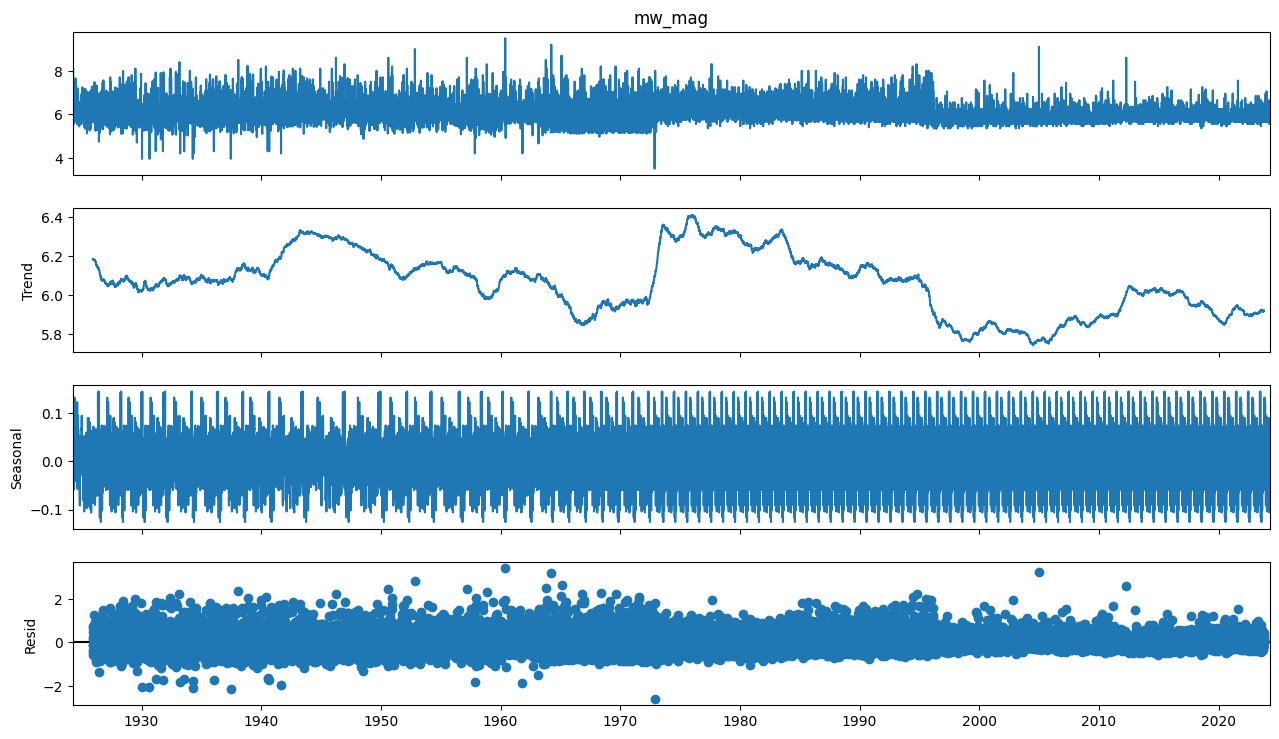

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(daily_data, model='additive', period=365)

fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()


# **Augmented Dickey-Fuller test to check for stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(daily_data)

adf_summary = {
    'Test Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Number of Lags Used': adf_result[2],
    'Number of Observations Used': adf_result[3],
    'Critical Values': adf_result[4],
}

adf_summary


{'Test Statistic': -8.456964693327267,
 'p-value': 1.6051455027715078e-13,
 'Number of Lags Used': 48,
 'Number of Observations Used': 27507,
 'Critical Values': {'1%': -3.4305877544025027,
  '5%': -2.8616450806695526,
  '10%': -2.56682593129456}}

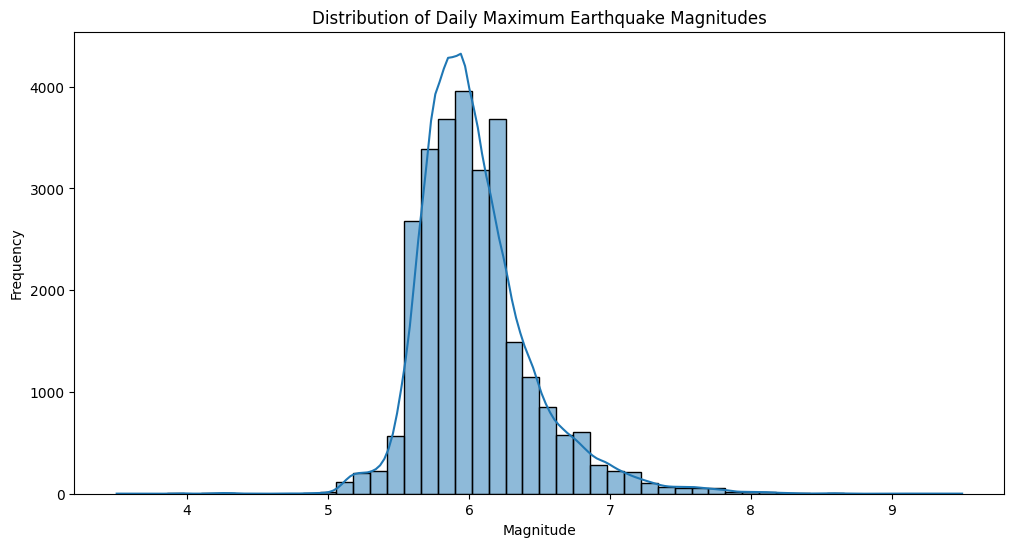

{'Skewness': 1.2394363316255212, 'Kurtosis': 6.806534359822237}

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(daily_data, kde=True, bins=50)
plt.title('Distribution of Daily Maximum Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

from scipy.stats import skew, kurtosis

magnitude_skewness = skew(daily_data)
magnitude_kurtosis = kurtosis(daily_data, fisher=False)

skewness_kurtosis_summary = {
    'Skewness': magnitude_skewness,
    'Kurtosis': magnitude_kurtosis
}

skewness_kurtosis_summary


# **Log-Transformed Distribution**

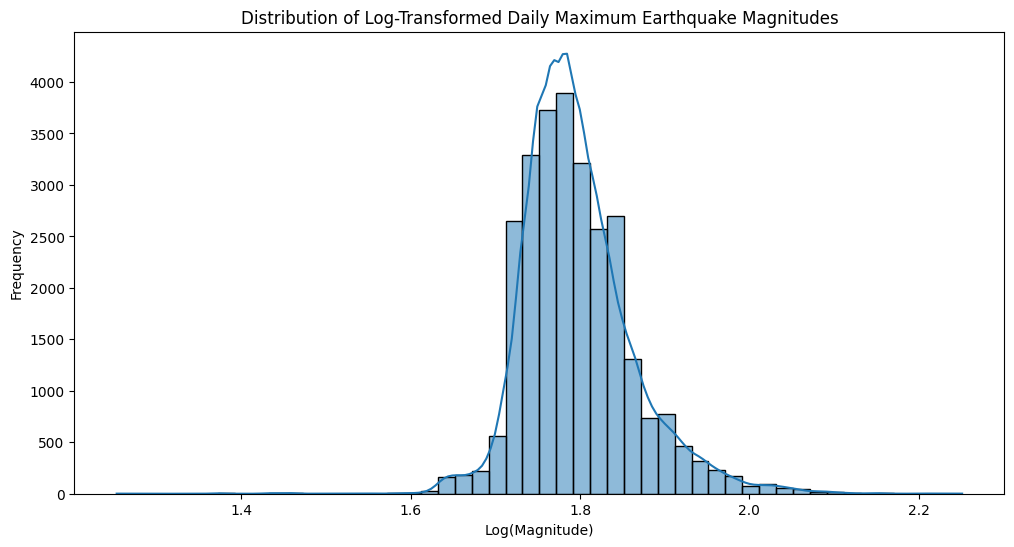

{'Transformed Skewness': 0.8351450973101445,
 'Transformed Kurtosis': 5.884861500458392}

In [ ]:
daily_data_transformed = np.log(daily_data)

plt.figure(figsize=(12, 6))
sns.histplot(daily_data_transformed, kde=True, bins=50)
plt.title('Distribution of Log-Transformed Daily Maximum Earthquake Magnitudes')
plt.xlabel('Log(Magnitude)')
plt.ylabel('Frequency')
plt.show()

transformed_skewness = skew(daily_data_transformed)
transformed_kurtosis = kurtosis(daily_data_transformed, fisher=False)  # Pearson definition of kurtosis

transformed_skewness_kurtosis_summary = {
    'Transformed Skewness': transformed_skewness,
    'Transformed Kurtosis': transformed_kurtosis
}

transformed_skewness_kurtosis_summary


# **First Differencing**

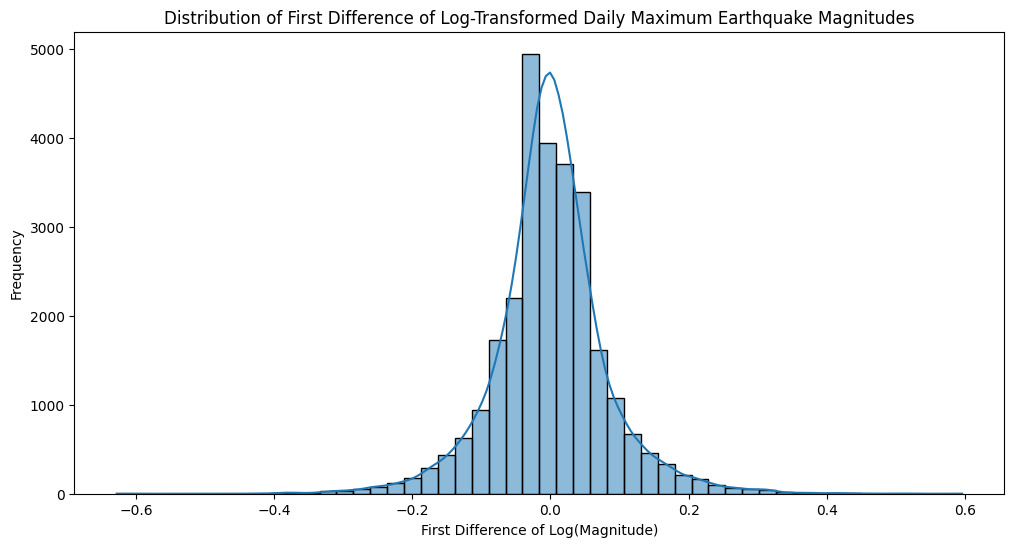

{'Differenced Skewness': 0.12109615210680706,
 'Differenced Kurtosis': 6.0970504411792845}

In [ ]:
daily_data_diff = daily_data_transformed.diff().dropna()

plt.figure(figsize=(12, 6))
sns.histplot(daily_data_diff, kde=True, bins=50)
plt.title('Distribution of First Difference of Log-Transformed Daily Maximum Earthquake Magnitudes')
plt.xlabel('First Difference of Log(Magnitude)')
plt.ylabel('Frequency')
plt.show()

diff_skewness = skew(daily_data_diff)
diff_kurtosis = kurtosis(daily_data_diff, fisher=False)

diff_skewness_kurtosis_summary = {
    'Differenced Skewness': diff_skewness,
    'Differenced Kurtosis': diff_kurtosis
}

diff_skewness_kurtosis_summary


# **Second Differencing**

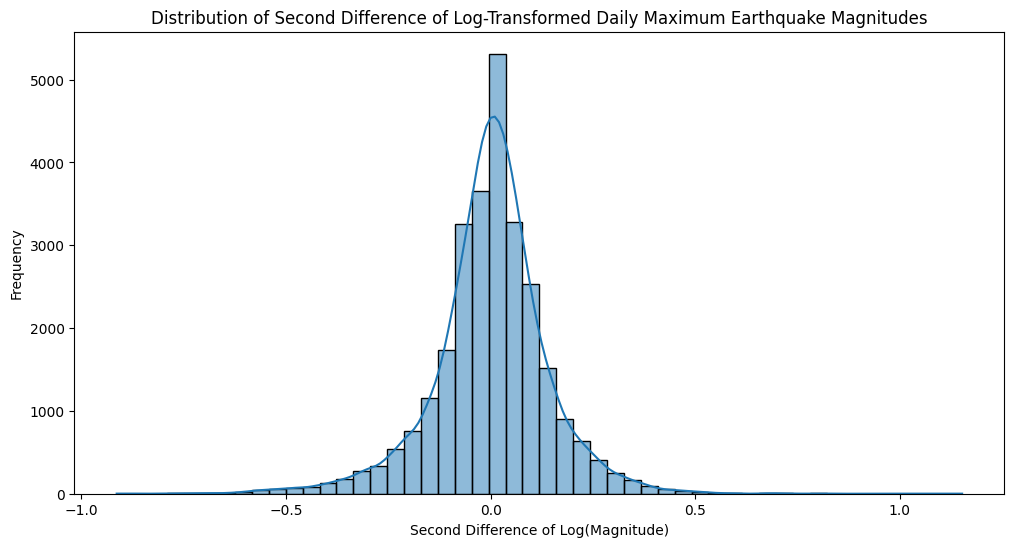

{'Second Differenced Skewness': -0.36843527957186606,
 'Second Differenced Kurtosis': 6.132393077415305}

In [ ]:
daily_data_diff2 = daily_data_diff.diff().dropna()

plt.figure(figsize=(12, 6))
sns.histplot(daily_data_diff2, kde=True, bins=50)
plt.title('Distribution of Second Difference of Log-Transformed Daily Maximum Earthquake Magnitudes')
plt.xlabel('Second Difference of Log(Magnitude)')
plt.ylabel('Frequency')
plt.show()

diff2_skewness = skew(daily_data_diff2)
diff2_kurtosis = kurtosis(daily_data_diff2, fisher=False)

diff2_skewness_kurtosis_summary = {
    'Second Differenced Skewness': diff2_skewness,
    'Second Differenced Kurtosis': diff2_kurtosis
}

diff2_skewness_kurtosis_summary


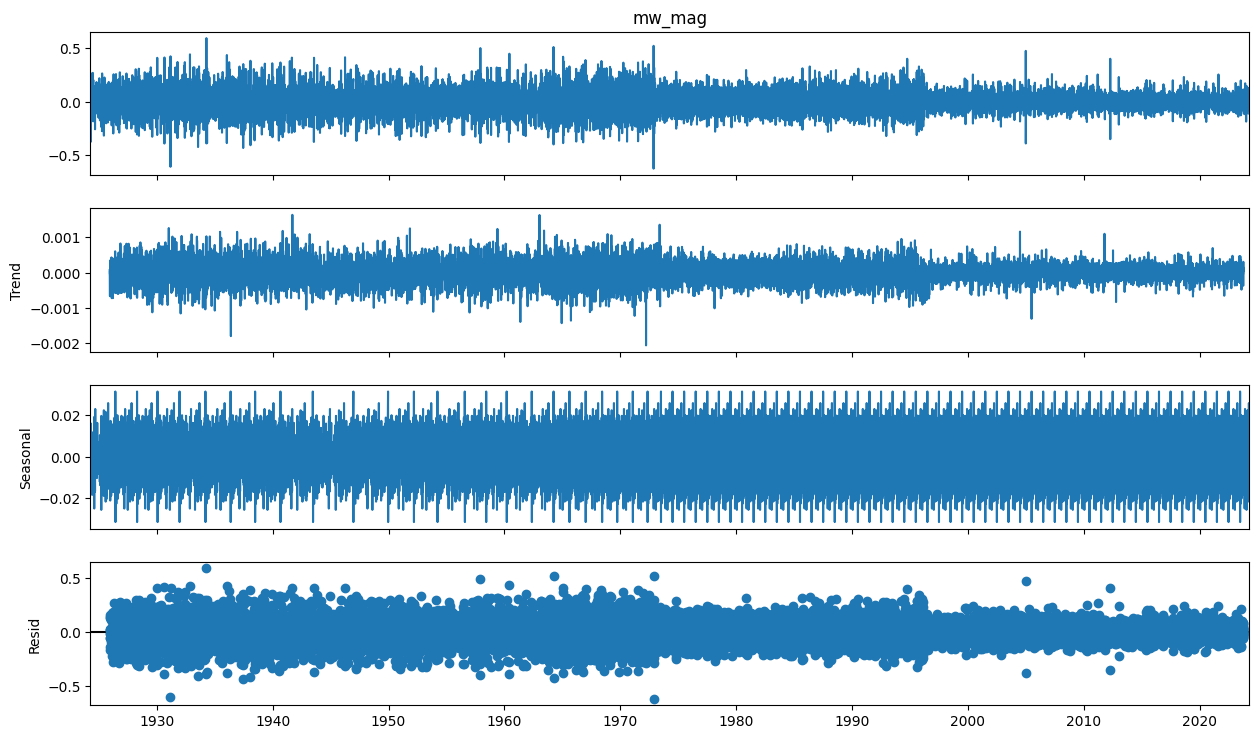

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(daily_data_diff, model='additive', period=365)

fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()


# **ACF & PACF**

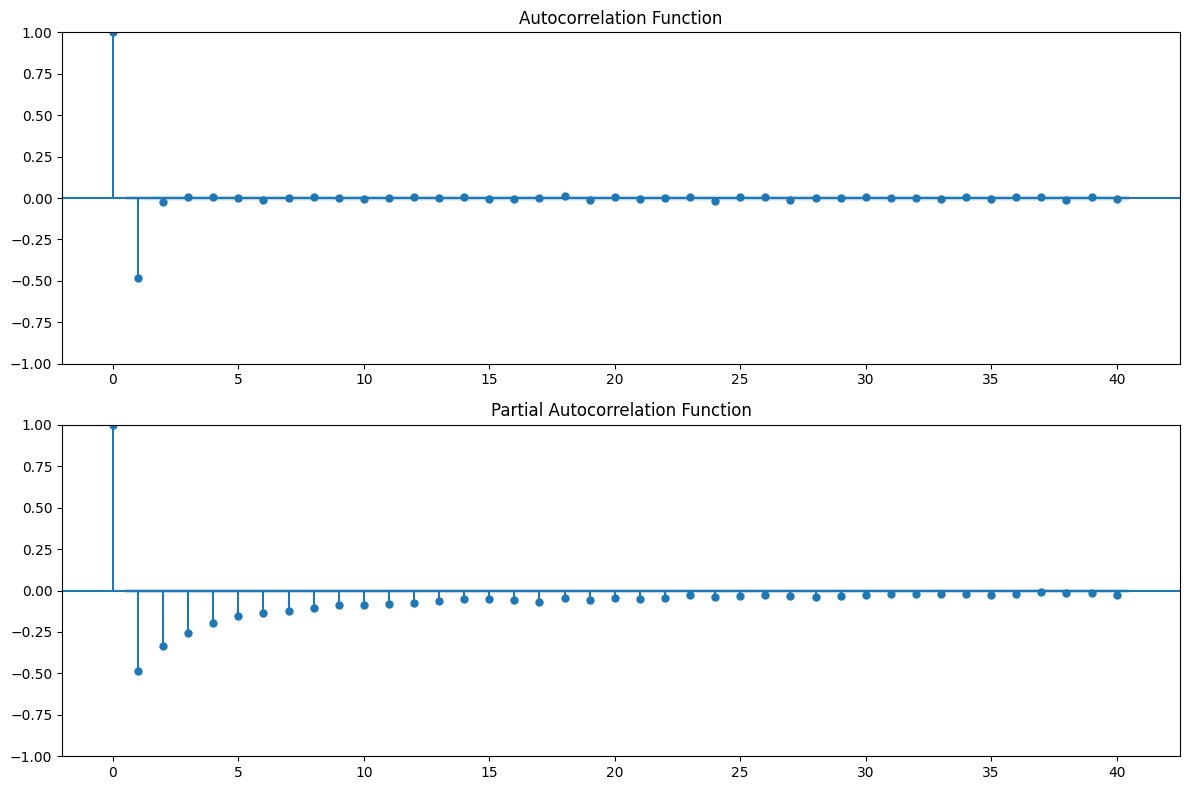

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(daily_data_diff, ax=ax1, lags=40, alpha=0.05)
ax1.set_title('Autocorrelation Function')

plot_pacf(daily_data_diff, ax=ax2, lags=40, alpha=0.05)
ax2.set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


In [ ]:
adf_result_diff = adfuller(daily_data_diff)

adf_summary_diff = {
    'Test Statistic': adf_result_diff[0],
    'p-value': adf_result_diff[1],
    'Number of Lags Used': adf_result_diff[2],
    'Number of Observations Used': adf_result_diff[3],
    'Critical Values': adf_result_diff[4],
}

adf_summary_diff


{'Test Statistic': -38.45251370662812,
 'p-value': 0.0,
 'Number of Lags Used': 49,
 'Number of Observations Used': 27505,
 'Critical Values': {'1%': -3.4305877716922026,
  '5%': -2.861645088310801,
  '10%': -2.566825935361821}}

# **ARIMA Model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(daily_data_transformed, order=(1, 1, 1))
model_fit = model.fit()

model_fit.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 mw_mag   No. Observations:                27556
Model:                 ARIMA(1, 1, 1)   Log Likelihood               38705.530
Date:                Fri, 10 May 2024   AIC                         -77405.061
Time:                        19:00:43   BIC                         -77380.389
Sample:                             0   HQIC                        -77397.112
                              - 27556                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0368      0.005      7.438      0.000       0.027       0.046
ma.L1         -0.9858      0.001  -1079.808      0.000      -0.988      -0.984
sigma2         0.0035   1.66e-05    211.858      0.000       0.003       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             27102.43
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

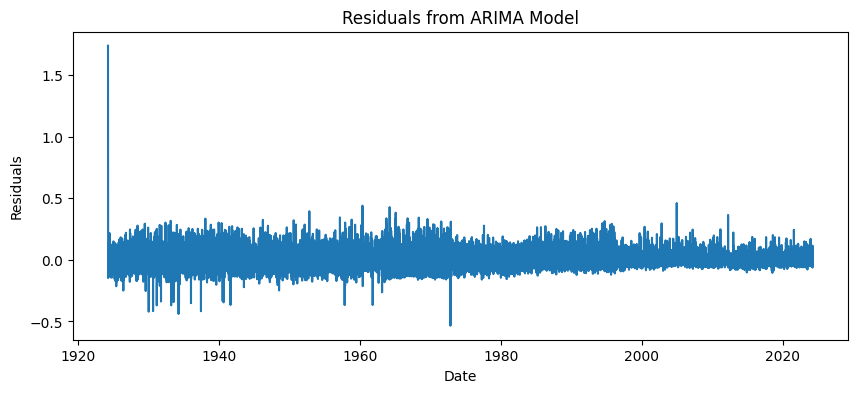

In [ ]:
residuals = model_fit.resid

plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()


<Figure size 1000x400 with 0 Axes>

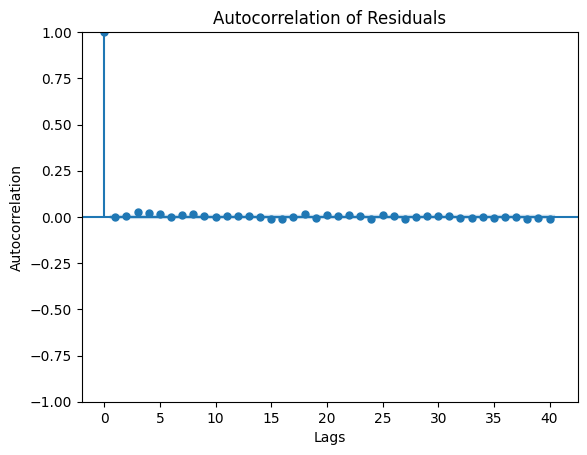

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 4))
plot_acf(residuals, lags=40)
plt.title('Autocorrelation of Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()


# **Different ARIMA Models**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

orders = [(0,1,1), (1,1,0), (1,1,1), (2,1,1), (1,1,2), (2,1,2), (0,1,2), (2,1,0)]

results = []

for order in orders:
    model = ARIMA(daily_data_transformed, order=order)
    model_fit = model.fit()
    results.append({
        'Order': order,
        'AIC': model_fit.aic,
        'BIC': model_fit.bic
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='AIC'))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


       Order           AIC           BIC
2  (1, 1, 1) -77405.060872 -77380.389054
6  (0, 1, 2) -77404.593512 -77379.921694
3  (2, 1, 1) -77404.272477 -77371.376720
5  (2, 1, 2) -77401.063173 -77359.943476
4  (1, 1, 2) -77374.706957 -77341.811199
0  (0, 1, 1) -77371.494177 -77355.046299
7  (2, 1, 0) -70404.445762 -70379.773944
1  (1, 1, 0) -67084.450104 -67068.002226


In [ ]:
model = ARIMA(daily_data_transformed, order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
forecast_periods = 30

forecast = model_fit.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# **Forcasting**

In [ ]:
forecast_mean_original_scale = np.exp(forecast_mean)
forecast_conf_int_original_scale = np.exp(forecast_conf_int)


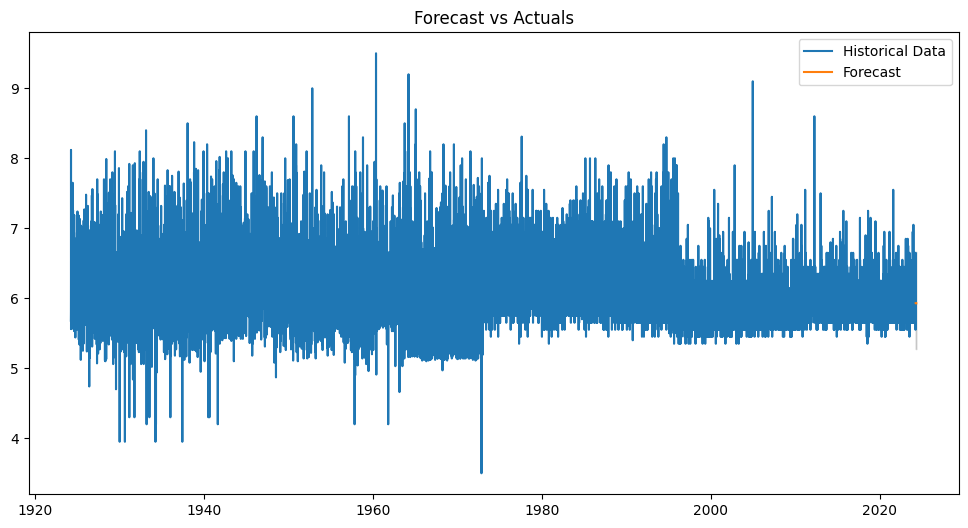

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data_transformed.index, np.exp(daily_data_transformed), label='Historical Data')

future_dates = pd.date_range(start=daily_data_transformed.index[-1], periods=forecast_periods + 1, freq='D')[1:]
plt.plot(future_dates, forecast_mean_original_scale, label='Forecast')
plt.fill_between(future_dates, forecast_conf_int_original_scale.iloc[:, 0], forecast_conf_int_original_scale.iloc[:, 1], color='gray', alpha=0.3)

plt.title('Forecast vs Actuals')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


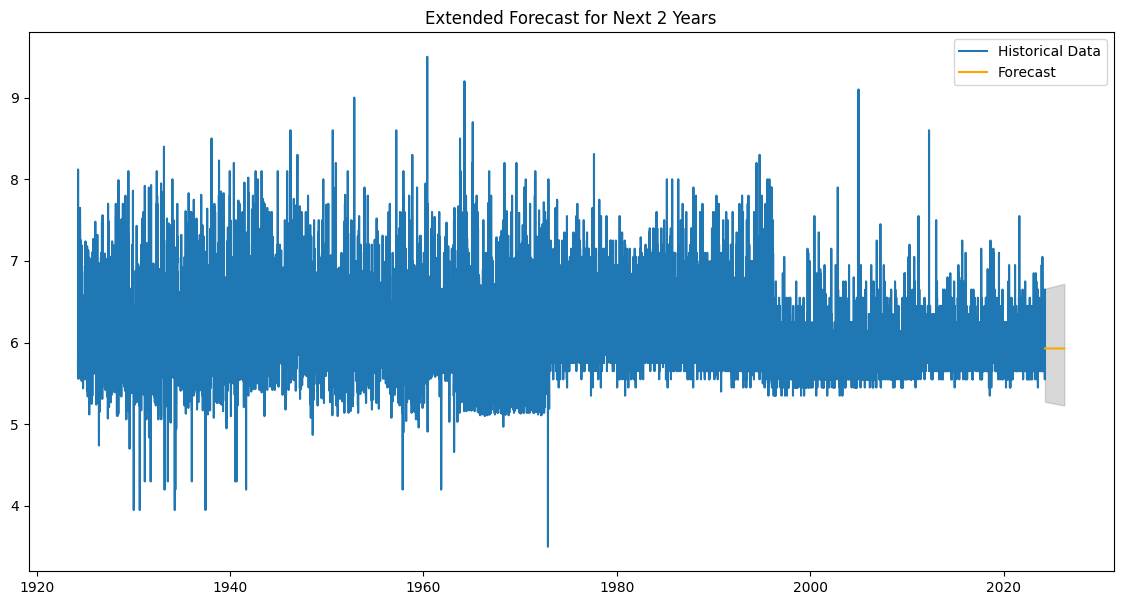

In [ ]:
forecast_periods = 730

forecast = model_fit.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

forecast_mean_original_scale = np.exp(forecast_mean)
forecast_conf_int_original_scale = np.exp(forecast_conf_int)

plt.figure(figsize=(14, 7))
plt.plot(daily_data_transformed.index, np.exp(daily_data_transformed), label='Historical Data')
future_dates = pd.date_range(start=daily_data_transformed.index[-1], periods=forecast_periods + 1, freq='D')[1:]
plt.plot(future_dates, forecast_mean_original_scale, label='Forecast', color='orange')
plt.fill_between(future_dates, forecast_conf_int_original_scale.iloc[:, 0], forecast_conf_int_original_scale.iloc[:, 1], color='gray', alpha=0.3)
plt.title('Extended Forecast for Next 2 Years')
plt.legend()
plt.show()


# **Forcasting for next 2 years**

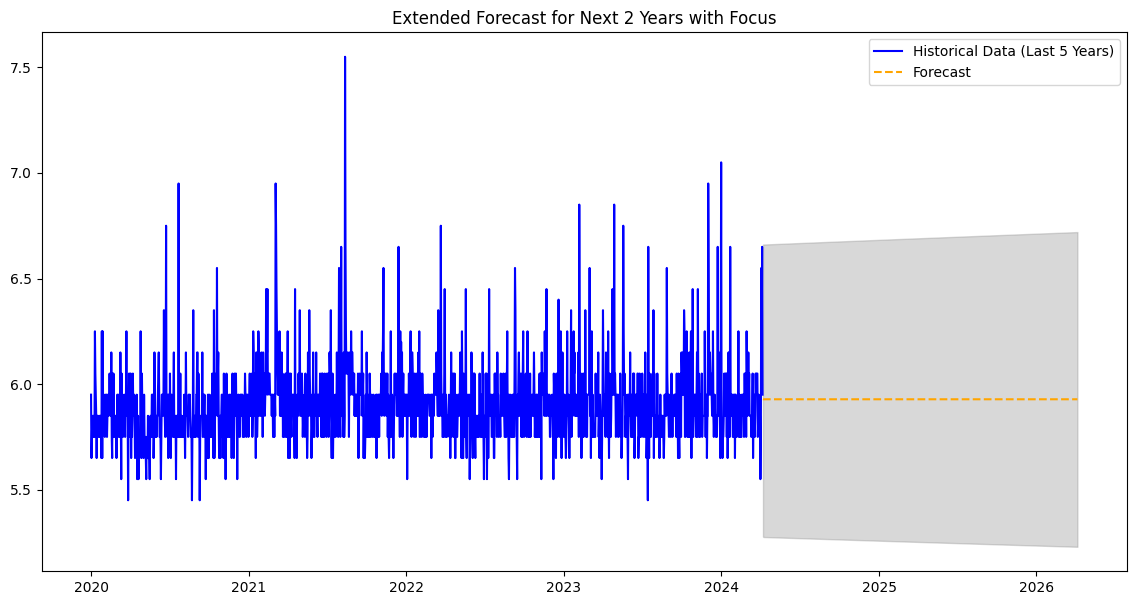

In [ ]:
last_5_years = daily_data_transformed.last('5Y').index

future_dates = pd.date_range(start=daily_data_transformed.index[-1], periods=730 + 1, freq='D')[1:]

plt.figure(figsize=(14, 7))
plt.plot(last_5_years, np.exp(daily_data_transformed[last_5_years]), label='Historical Data (Last 5 Years)', color='blue')
plt.plot(future_dates, forecast_mean_original_scale, label='Forecast', color='orange', linestyle='--')
plt.fill_between(future_dates, forecast_conf_int_original_scale.iloc[:, 0], forecast_conf_int_original_scale.iloc[:, 1], color='gray', alpha=0.3)
plt.title('Extended Forecast for Next 2 Years with Focus')
plt.legend()
plt.show()


In [ ]:
forecast_values = {
    'Date': future_dates,
    'Forecast': forecast_mean_original_scale,
    'Lower CI': forecast_conf_int_original_scale.iloc[:, 0],
    'Upper CI': forecast_conf_int_original_scale.iloc[:, 1]
}

forecast_df = pd.DataFrame(forecast_values)
print(forecast_df.head())


                           Date  Forecast  Lower CI  Upper CI
27556 2024-04-07 00:00:00+00:00  5.929040  5.277595  6.660898
27557 2024-04-08 00:00:00+00:00  5.928271  5.276115  6.661038
27558 2024-04-09 00:00:00+00:00  5.928243  5.276011  6.661106
27559 2024-04-10 00:00:00+00:00  5.928242  5.275943  6.661189
27560 2024-04-11 00:00:00+00:00  5.928242  5.275877  6.661272


In [ ]:
forecast_periods = 1825

forecast = model_fit.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

forecast_mean_original_scale = np.exp(forecast_mean)
forecast_conf_int_original_scale = np.exp(forecast_conf_int)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# **Forcasting for next 5 years**

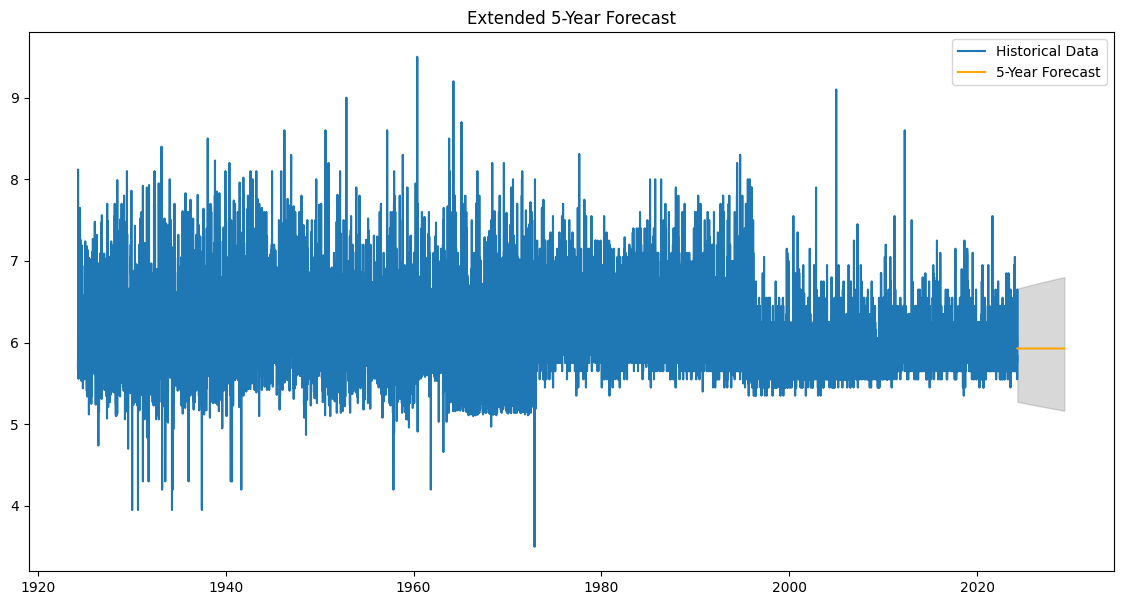

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(daily_data_transformed.index, np.exp(daily_data_transformed), label='Historical Data')

future_dates = pd.date_range(start=daily_data_transformed.index[-1], periods=forecast_periods + 1, freq='D')[1:]
plt.plot(future_dates, forecast_mean_original_scale, label='5-Year Forecast', color='orange')
plt.fill_between(future_dates, forecast_conf_int_original_scale.iloc[:, 0], forecast_conf_int_original_scale.iloc[:, 1], color='gray', alpha=0.3)

plt.title('Extended 5-Year Forecast')
plt.legend()
plt.show()


In [ ]:
forecast_values = {
    'Date': future_dates,
    'Forecast': forecast_mean_original_scale,
    'Lower CI': forecast_conf_int_original_scale.iloc[:, 0],
    'Upper CI': forecast_conf_int_original_scale.iloc[:, 1]
}

forecast_df = pd.DataFrame(forecast_values)
print(forecast_df.head())


                           Date  Forecast  Lower CI  Upper CI
27556 2024-04-07 00:00:00+00:00  5.929040  5.277595  6.660898
27557 2024-04-08 00:00:00+00:00  5.928271  5.276115  6.661038
27558 2024-04-09 00:00:00+00:00  5.928243  5.276011  6.661106
27559 2024-04-10 00:00:00+00:00  5.928242  5.275943  6.661189
27560 2024-04-11 00:00:00+00:00  5.928242  5.275877  6.661272


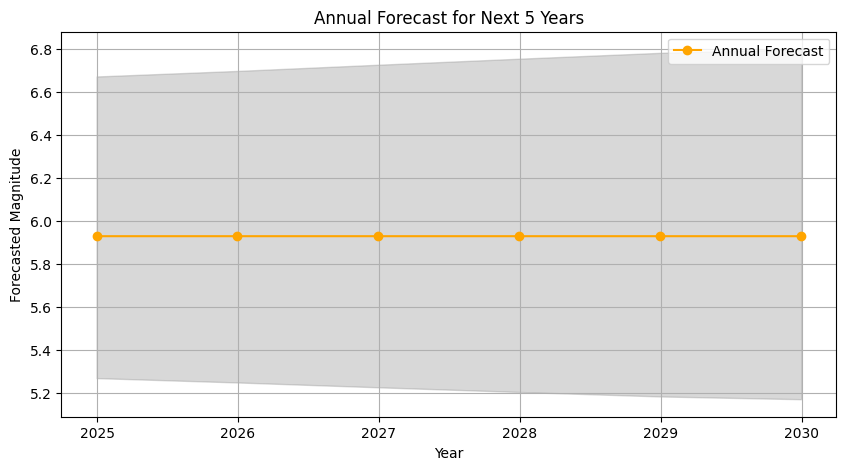

In [ ]:
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecast': forecast_mean_original_scale,
    'Lower CI': forecast_conf_int_original_scale.iloc[:, 0],
    'Upper CI': forecast_conf_int_original_scale.iloc[:, 1]
})

forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])
forecast_df.set_index('Date', inplace=True)

annual_forecast_df = forecast_df.resample('A').mean()

plt.figure(figsize=(10, 5))
plt.plot(annual_forecast_df.index, annual_forecast_df['Forecast'], marker='o', linestyle='-', color='orange', label='Annual Forecast')
plt.fill_between(annual_forecast_df.index, annual_forecast_df['Lower CI'], annual_forecast_df['Upper CI'], color='gray', alpha=0.3)
plt.title('Annual Forecast for Next 5 Years')
plt.xlabel('Year')
plt.ylabel('Forecasted Magnitude')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
annual_forecast_df = forecast_df.resample('A').mean()

print(annual_forecast_df)


                           Forecast  Lower CI  Upper CI
Date                                                   
2024-12-31 00:00:00+00:00  5.928245  5.267359  6.672057
2025-12-31 00:00:00+00:00  5.928242  5.247062  6.697864
2026-12-31 00:00:00+00:00  5.928242  5.224536  6.726741
2027-12-31 00:00:00+00:00  5.928242  5.202845  6.754785
2028-12-31 00:00:00+00:00  5.928242  5.181883  6.782110
2029-12-31 00:00:00+00:00  5.928242  5.168997  6.799009
